In [1]:
import polars as pl
import matplotlib.pyplot as plt

## Exploring a dataset of Netflix Movies and TV Shows 
In this notebook, I will explore [a dataset from Kaggle on Netflix movies and shows](https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download). I am interested in trends of movies and shows over time, specifically whether movie and TV show ratings have matured as we have switched to online streaming platforms instead of traditional cable TV. 

In [2]:
data = pl.read_csv("netflix_titles.csv")  # reading in the data

In [3]:
data.head()  # checking columns and looking into the dataset

show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
str,str,str,str,str,str,str,i64,str,str,str,str
"""s1""","""Movie""","""Dick Johnson Is Dead""","""Kirsten Johnson""",null,"""United States""","""September 25, 2021""",2020,"""PG-13""","""90 min""","""Documentaries""","""As her father nears the end of…"
"""s2""","""TV Show""","""Blood & Water""",null,"""Ama Qamata, Khosi Ngema, Gail …","""South Africa""","""September 24, 2021""",2021,"""TV-MA""","""2 Seasons""","""International TV Shows, TV Dra…","""After crossing paths at a part…"
"""s3""","""TV Show""","""Ganglands""","""Julien Leclercq""","""Sami Bouajila, Tracy Gotoas, S…",null,"""September 24, 2021""",2021,"""TV-MA""","""1 Season""","""Crime TV Shows, International …","""To protect his family from a p…"
"""s4""","""TV Show""","""Jailbirds New Orleans""",null,null,null,"""September 24, 2021""",2021,"""TV-MA""","""1 Season""","""Docuseries, Reality TV""","""Feuds, flirtations and toilet …"
"""s5""","""TV Show""","""Kota Factory""",null,"""Mayur More, Jitendra Kumar, Ra…","""India""","""September 24, 2021""",2021,"""TV-MA""","""2 Seasons""","""International TV Shows, Romant…","""In a city of coaching centers …"


In [4]:
data.shape  # understanding the shape of the data

(8807, 12)

### Generating Summary Statistics of Release Year:

In [5]:
data["release_year"].mean()

2014.1801975701146

In [6]:
data["release_year"].std()

8.819312130833968

***Release Year information***  
  
The mean release year of movies and TV shows is **2014** while the median is **2017**. The earliest piece of entertainment is **1925** and the latest that this dataset includes is **2021**. 

In [7]:
data["release_year"].describe()

statistic,value
str,f64
"""count""",8807.0
"""null_count""",0.0
"""mean""",2014.180198
"""std""",8.819312
"""min""",1925.0
"""25%""",2013.0
"""50%""",2017.0
"""75%""",2019.0
"""max""",2021.0


*Rating Types*  
I decided to see what categories of ratings exist in the dataset and noticed that there were a few that seemed to not be ratings - '74 min', '84 min', and '66 min', with counts of only 1.  
  

  I decided to remove these values from the entire dataset because there were also only 1 of each in the entire dataset and they seemed like mistakes. 

In [8]:
data["rating"].value_counts()

rating,count
str,u32
"""84 min""",1
"""G""",41
"""TV-MA""",3207
"""PG-13""",490
"""NC-17""",3
…,…
null,4
"""PG""",287
"""66 min""",1


In [9]:
data = data.filter(pl.col("rating") != "74 min")

In [10]:
data = data.filter(pl.col("rating") != "84 min")

In [11]:
data = data.filter(pl.col("rating") != "66 min")

In [12]:
data["rating"].value_counts()  # removed the ratings that seemed to be mistakes

rating,count
str,u32
"""TV-Y""",307
"""NR""",80
"""TV-14""",2160
"""TV-MA""",3207
"""TV-Y7""",334
…,…
"""G""",41
"""NC-17""",3
"""PG""",287


***Movies***  
  
  I decided to look specifically at movies, so I created a dataframe of just the movies.

In [13]:
movies = data.filter(pl.col("type") == "Movie")

In [14]:
movies.head()

show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
str,str,str,str,str,str,str,i64,str,str,str,str
"""s1""","""Movie""","""Dick Johnson Is Dead""","""Kirsten Johnson""",null,"""United States""","""September 25, 2021""",2020,"""PG-13""","""90 min""","""Documentaries""","""As her father nears the end of…"
"""s7""","""Movie""","""My Little Pony: A New Generati…","""Robert Cullen, José Luis Ucha""","""Vanessa Hudgens, Kimiko Glenn,…",null,"""September 24, 2021""",2021,"""PG""","""91 min""","""Children & Family Movies""","""Equestria's divided. But a bri…"
"""s8""","""Movie""","""Sankofa""","""Haile Gerima""","""Kofi Ghanaba, Oyafunmike Ogunl…","""United States, Ghana, Burkina …","""September 24, 2021""",1993,"""TV-MA""","""125 min""","""Dramas, Independent Movies, In…","""On a photo shoot in Ghana, an …"
"""s10""","""Movie""","""The Starling""","""Theodore Melfi""","""Melissa McCarthy, Chris O'Dowd…","""United States""","""September 24, 2021""",2021,"""PG-13""","""104 min""","""Comedies, Dramas""","""A woman adjusting to life afte…"
"""s13""","""Movie""","""Je Suis Karl""","""Christian Schwochow""","""Luna Wedler, Jannis Niewöhner,…","""Germany, Czech Republic""","""September 23, 2021""",2021,"""TV-MA""","""127 min""","""Dramas, International Movies""","""After most of her family is mu…"


In [15]:
movies["rating"].value_counts()

rating,count
str,u32
"""R""",797
"""TV-Y""",131
"""PG-13""",490
"""G""",41
"""UR""",3
…,…
"""NR""",75
"""TV-PG""",540
"""TV-Y7""",139


**Years and ratings**  
We can see that the more mature rated movies (NC-17, R, TV-MA) were, on average, released in the 2010s and after, whereas G and PG rated movies were released, on average, earlier. 

In [16]:
years_and_ratings = movies.group_by("rating").agg([pl.mean("release_year")])

In [17]:
years_and_ratings

rating,release_year
str,f64
"""TV-PG""",2012.524074
"""PG-13""",2009.314286
"""NR""",2010.866667
"""NC-17""",2015.0
"""TV-G""",2016.396825
…,…
"""TV-MA""",2015.979631
"""R""",2010.459222
"""PG""",2008.428571


I created a table which counts the number of movies released by rating in each year and plotted it in a stacked bar chart. Through this graph, we can see that TV-MA and TV-14 ratings take up a large portion of the movies released as we move later in the 2000s and especially by 2015.  

In [18]:
movie_years_rates = (
    movies.group_by(["release_year", "rating"])
    .agg(pl.len().alias("count"))
    .pivot(index="release_year", on="rating", values="count")
    .fill_null(0)  # Fill missing values with 0
)

In [19]:
movie_years_rates

release_year,TV-G,PG,G,TV-PG,TV-Y7-FV,TV-14,NC-17,TV-MA,R,PG-13,TV-Y,NR,TV-Y7,UR
i64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
2021,9,11,0,20,0,73,0,110,21,14,6,0,13,0
2008,1,10,0,6,0,29,0,20,19,24,1,0,2,1
1995,0,2,1,2,0,4,0,0,4,10,0,0,0,0
2019,15,12,1,62,0,160,0,286,39,19,25,0,14,0
2018,18,31,2,71,1,176,1,358,52,30,13,1,13,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1987,0,0,0,1,0,1,0,1,2,2,0,1,0,0
1968,0,0,1,0,0,0,0,0,1,1,0,0,0,0
1980,0,1,0,1,0,4,0,0,5,0,0,0,0,0


73
4 None
73
2 None
73
1 None
73
5 None
73
8 None
73
5 None
73
5 None
73
5 None
73
1 None
73
5 None
73
4 None
73
2 None
73
5 None
73
2 None


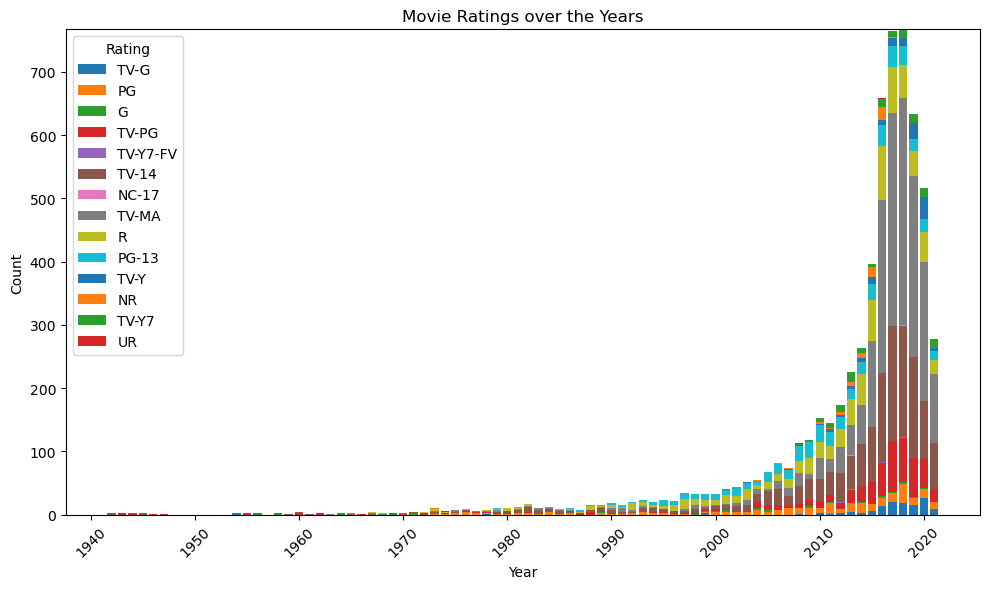

In [20]:
release_years = movie_years_rates["release_year"].to_numpy()
ratings = movie_years_rates.columns[1:]  # Skip the first column ('release_year')

# Convert Polars DataFrame to numpy array (counts of each rating)
movie_numpy = movie_years_rates.drop("release_year").to_numpy()

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = None  # To stack the bars

# Loop through each rating and plot stacked bars
for i, rating in enumerate(ratings):
    counts = movie_numpy[:, i]  # Get the count for each rating
    print(len(rating), print(len(counts)))

    ax.bar(release_years, counts, bottom=bottom, label=rating)
    if bottom is None:
        bottom = counts  # Initialize bottom with the first bar
    else:
        bottom += counts  # Stack bars

# Add labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("Movie Ratings over the Years")
ax.legend(title="Rating")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**TV Shows**  
I decided to do the same with TV Shows to see if trends were similar. 

In [21]:
shows = data.filter(pl.col("type") == "TV Show")

In [22]:
shows.head()

show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
str,str,str,str,str,str,str,i64,str,str,str,str
"""s2""","""TV Show""","""Blood & Water""",null,"""Ama Qamata, Khosi Ngema, Gail …","""South Africa""","""September 24, 2021""",2021,"""TV-MA""","""2 Seasons""","""International TV Shows, TV Dra…","""After crossing paths at a part…"
"""s3""","""TV Show""","""Ganglands""","""Julien Leclercq""","""Sami Bouajila, Tracy Gotoas, S…",null,"""September 24, 2021""",2021,"""TV-MA""","""1 Season""","""Crime TV Shows, International …","""To protect his family from a p…"
"""s4""","""TV Show""","""Jailbirds New Orleans""",null,null,null,"""September 24, 2021""",2021,"""TV-MA""","""1 Season""","""Docuseries, Reality TV""","""Feuds, flirtations and toilet …"
"""s5""","""TV Show""","""Kota Factory""",null,"""Mayur More, Jitendra Kumar, Ra…","""India""","""September 24, 2021""",2021,"""TV-MA""","""2 Seasons""","""International TV Shows, Romant…","""In a city of coaching centers …"
"""s6""","""TV Show""","""Midnight Mass""","""Mike Flanagan""","""Kate Siegel, Zach Gilford, Ham…",null,"""September 24, 2021""",2021,"""TV-MA""","""1 Season""","""TV Dramas, TV Horror, TV Myste…","""The arrival of a charismatic y…"


**Years and Ratings**  
We can see that the TV shows' mean release years were all in the 2010s, likely reflecting the massive surge in Netflix and its streaming shows. The rating of TV-MA average is 2017 - 2018 which is later than most other ratings.

In [23]:
tv_years_and_ratings = shows.group_by("rating").agg([pl.mean("release_year")])

In [24]:
tv_years_and_ratings

rating,release_year
str,f64
"""TV-MA""",2017.889956
"""TV-Y7""",2015.410256
"""TV-Y7-FV""",2014.0
"""TV-G""",2014.87234
"""TV-14""",2015.698499
"""R""",2015.5
"""TV-Y""",2017.039773
"""TV-PG""",2015.210526
"""NR""",2011.6


In [25]:
tv_years_rates = (
    shows.group_by(["release_year", "rating"])
    .agg(pl.count().alias("count"))
    .pivot(index="release_year", columns="rating", values="count")
    .fill_null(0)  # Fill missing values with 0
)

C:\Users\jenny\AppData\Local\Temp\ipykernel_19560\1384884916.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
C:\Users\jenny\AppData\Local\Temp\ipykernel_19560\1384884916.py:4: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  .pivot(index="release_year", columns="rating", values="count")


In [26]:
tv_years_rates

release_year,TV-Y7,TV-G,TV-14,TV-Y,TV-MA,TV-PG,TV-Y7-FV,NR,R
i64,u32,u32,u32,u32,u32,u32,u32,u32,u32
2006,1,0,7,0,4,2,0,0,0
1993,1,1,0,0,1,1,0,0,0
2012,4,1,27,6,13,13,0,0,0
2015,10,5,57,10,49,28,0,1,1
2008,2,3,9,1,5,3,0,0,0
…,…,…,…,…,…,…,…,…,…
2000,2,0,0,0,0,2,0,0,0
1972,0,0,0,0,1,0,0,0,0
1963,0,0,1,0,0,0,0,0,0


Creating a similar stacked bar chart, we can see that TV-MA takes up a large portion of shows, especially after 2017, though most of the data is concentrated post-2010s anyways, so it is tough to see much of a trend before that. 

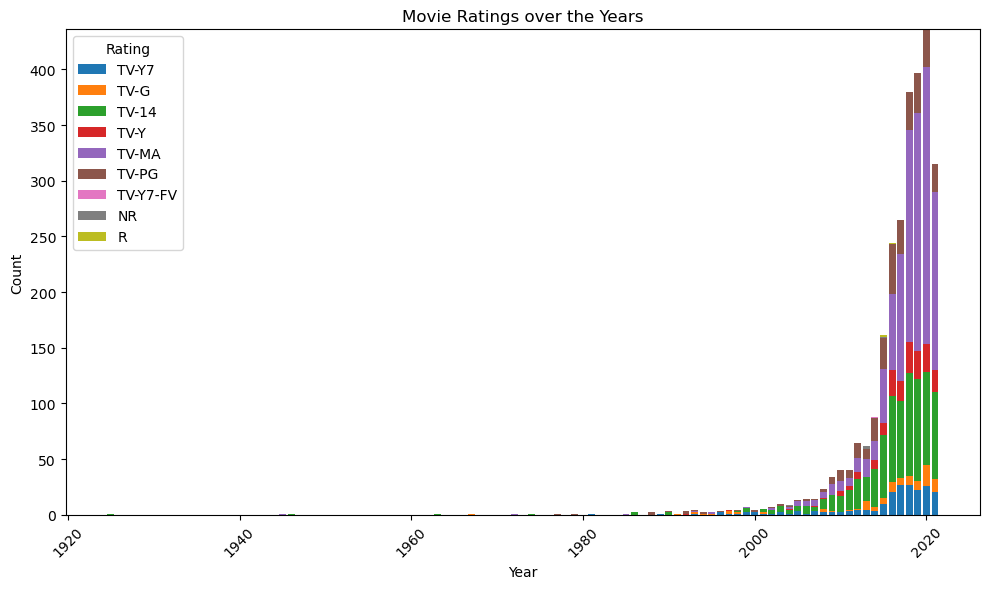

In [27]:
tv_release_years = tv_years_rates["release_year"].to_numpy()
tv_ratings = tv_years_rates.columns[1:]  # Skip the first column ('release_year')

# Convert Polars DataFrame to numpy array (counts of each rating)
tv_numpy = tv_years_rates.drop("release_year").to_numpy()

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = None  # To stack the bars

# Loop through each rating and plot stacked bars
for i, rating in enumerate(tv_ratings):
    counts = tv_numpy[:, i]  # Get the count for each rating
    ax.bar(tv_release_years, counts, bottom=bottom, label=rating)
    if bottom is None:
        bottom = counts  # Initialize bottom with the first bar
    else:
        bottom += counts  # Stack bars

# Add labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("Movie Ratings over the Years")
ax.legend(title="Rating")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Conclusion  
  
  I was interested in seeing if there was a trend in TV and movie maturity ratings over the years. Based on the data and graphs, it does seem that rated R and mature movies are taking up more of a portion of the content. However, some ratings, such as NC-17, were not introduced in the film industry until the late '90s. Additionally, the film industry has had controversy in regards to the inconsistency of content allowed in and between different movie ratings, e.g. the PG-13 movie rating is considered very broad and movie content vary greatly within PG-13 movies (source [Wikipedia](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system)). Thus, it is possible that to err on the side of caution, especially with streaming services being so accessible ot children nowadays, that there is an inflation or 'over' count of mature ratings, explaining the seemingly large proportion of TV-MA content on Netflix. 